In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [3]:
dataset = sns.load_dataset("diamonds")

In [4]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

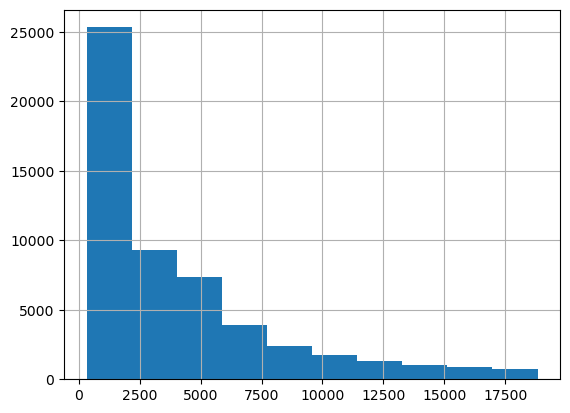

In [5]:
dataset["price"].hist()


---

### 💡 Bayangkan kamu punya data harga seperti ini:

```python
dataset["price"] = [100, 1000, 10000]
```

Ini artinya kamu punya 3 harga: 100, 1000, dan 10000.

---

### 🔍 Sekarang kamu jalankan:

```python
log_price = dataset["price"].apply(np.log)
```

#### Ini maksudnya:

> “Ambil kolom `price`, lalu **setiap angkanya dihitung logaritmanya** (log basis e, atau logaritma natural). Hasilnya disimpan di `log_price`.”

---

### 🔢 Contoh konkret:

| price | log(price) pakai `np.log()` |
| ----- | --------------------------- |
| 100   | 4.605                       |
| 1000  | 6.908                       |
| 10000 | 9.210                       |

Jadi hasilnya:

```python
log_price = [4.605, 6.908, 9.210]
```

---

### ⚙️ Kenapa pakai `.apply()`?

`.apply()` artinya:

> Jalankan fungsi tertentu (dalam hal ini `np.log`) ke **setiap baris** atau **setiap elemen** di kolom.

Kalau kamu nulis:

```python
dataset["price"].apply(np.log)
```

Artinya:

> “Untuk semua harga dalam kolom `price`, jalankan `np.log(harga)` satu per satu.”

---

### ✨ Ilustrasi Sederhana:

Kalau tanpa `.apply()`, kamu harus nulis:

```python
np.log(100)     # 4.605
np.log(1000)    # 6.908
np.log(10000)   # 9.210
```

Tapi kalau pakai `.apply(np.log)`, kamu cukup nulis satu baris, dan semua dihitung otomatis.

---

Kalau kamu suka analogi:

> `.apply(np.log)` itu kayak kamu kasih daftar harga ke "mesin hitung log", dan mesin itu kasih balik daftar log-harga.

---


In [6]:
log_price = dataset["price"].apply(np.log)

In [7]:
log_price.head()

0    5.786897
1    5.786897
2    5.789960
3    5.811141
4    5.814131
Name: price, dtype: float64

<Axes: >

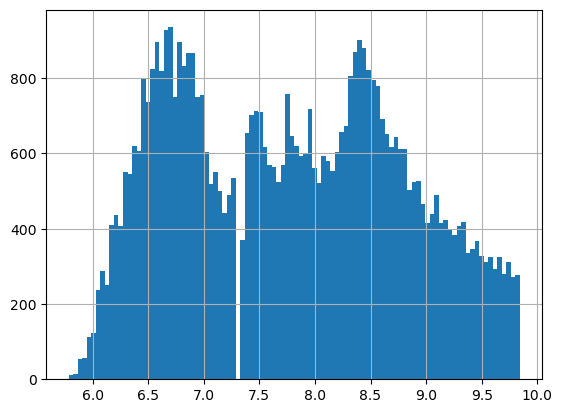

In [8]:
log_price.hist(bins = 100)



---

### 👀 Kode ini:

```python
dataset["price"].apply(lambda x: np.log(x) + 1)
```

berarti:

> Ambil setiap nilai `x` dari kolom `price`, lalu hitung `log(x) + 1` untuk tiap nilai tersebut.

---

### 🔎 Penjelasan langkah demi langkah:

1. `dataset["price"]` → ambil semua nilai di kolom `price`.
2. `.apply(...)` → jalankan sesuatu ke setiap nilai.
3. `lambda x: np.log(x) + 1` → fungsi kecil yang bilang:

   > "Untuk nilai `x`, hitung logaritma natural dari `x`, lalu tambahkan 1."

---

### 🔢 Contoh:

Misalnya kolom `price` berisi:

```python
[100, 1000, 10000]
```

Kita hitung manual:

* `np.log(100) + 1 ≈ 4.605 + 1 = 5.605`
* `np.log(1000) + 1 ≈ 6.908 + 1 = 7.908`
* `np.log(10000) + 1 ≈ 9.210 + 1 = 10.210`

Jadi hasil dari:

```python
dataset["price"].apply(lambda x: np.log(x) + 1)
```

adalah:

```python
[5.605, 7.908, 10.210]
```

---

### 🤔 Kenapa ditambah 1?

Ada beberapa alasan orang suka menambahkan 1 setelah (atau sebelum) log:

1. **Menghindari nilai nol** atau **hasil negatif**.
2. Kadang ada data dengan harga 1 → log(1) = 0 → bisa terlalu kecil.
3. Secara empiris: model bisa bekerja lebih baik dengan skala nilai yang sedikit lebih tinggi.

---

Kalau kamu penasaran:

* Bisa juga pakai `np.log1p(x)` yang otomatis = `log(x + 1)` (ini beda ya).
* Sedangkan `np.log(x) + 1` artinya hitung log dulu, baru tambah 1.

---


In [9]:
dataset["price"].apply(lambda x: np.log(x) + 1)

0        6.786897
1        6.786897
2        6.789960
3        6.811141
4        6.814131
           ...   
53935    8.921898
53936    8.921898
53937    8.921898
53938    8.921898
53939    8.921898
Name: price, Length: 53940, dtype: float64


---

### 🧠 Apa itu Outlier?

Outlier = nilai yang **jauh lebih besar atau lebih kecil** dari mayoritas data.

Contoh:

* Data: \[10, 12, 14, 13, 100]
* 100 kemungkinan outlier karena terlalu jauh dari lainnya.

---

### 📦 Kode Lengkap dan Penjelasannya:

```python
def outliers(x):
    q1, q3 = x.quantile([0.25, 0.75])  # ambil kuartil 1 dan kuartil 3
    iqr = q3 - q1                       # hitung IQR

    if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
        return True                    # x adalah outlier
    else:
        return False                   # x bukan outlier
```

---

### ❗ Masalah: Fungsi Ini Tidak Akan Jalan Benar

Masalah utama: `x` di sini diasumsikan satu angka, **tapi `.quantile()` hanya bisa dipanggil di `Series`**, bukan di angka tunggal.

#### 📛 Contoh yang error:

```python
outliers(100)
```

Akan error karena `100` bukan `Series`, dan nggak bisa `100.quantile(...)`.

---

### ✅ Versi yang benar biasanya seperti ini:

Misalnya kamu ingin tahu apakah angka 100 outlier dalam data `[10, 12, 13, 15, 100]`:

```python
def is_outlier(val, series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1

    return val < q1 - 1.5 * iqr or val > q3 + 1.5 * iqr
```

#### Contoh pakai:

```python
import pandas as pd

data = pd.Series([10, 12, 13, 15, 100])
print(is_outlier(100, data))  # True
print(is_outlier(13, data))   # False
```

---

### 🧪 Atau Kalau Mau Tandai Semua Outlier di Series:

```python
def detect_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (series < lower) | (series > upper)
```

#### Contoh pakai:

```python
outlier_mask = detect_outliers(data)
print(outlier_mask)
```

---


In [11]:
def outliers(x):

  q1, q3 = x.quantile([0.25, 0.75])
  iqr = q3 - q1

  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False


In [12]:
q1, q3 = dataset["price"].quantile([0.25, 0.75])
iqr = q3 - q1

def outliers(x):
  if (x > q3 + 1.5 * iqr) or (x < q1 - 1.5 * iqr):
    return True
  else:
    return False

dataset["price_outliers"] = dataset["price"].apply(outliers)
dataset["price_outliers"]

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price_outliers, Length: 53940, dtype: bool

In [13]:
dataset[dataset["price_outliers"]]

,carat,cut,color,clarity,depth,table,price,x,y,z,price_outliers
23820,1.17,Ideal,F,VVS1,62.1,57.0,11886,6.82,6.73,4.21,True
23821,2.08,Ideal,I,SI2,62.0,56.0,11886,8.21,8.10,5.06,True
23822,1.70,Premium,I,VS2,62.2,58.0,11888,7.65,7.60,4.74,True
23823,1.09,Ideal,F,IF,61.6,55.0,11888,6.59,6.65,4.08,True
23824,1.68,Ideal,E,SI2,60.4,55.0,11888,7.79,7.70,4.68,True
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,True
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,True
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,True
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,True


Fungsi ini:

```python
def min_max_scale(x):
    result = (x - x.min()) / (x.max() - x.min())
    return result
```

adalah fungsi untuk melakukan **normalisasi Min-Max** atau **Min-Max Scaling** pada data numerik. Ini adalah salah satu teknik **feature scaling** paling umum di machine learning.

---

### 🔍 Penjelasan

Min-Max Scaling mengubah nilai-nilai dalam sebuah kolom agar berada dalam **rentang \[0, 1]**, tanpa mengubah bentuk distribusinya.

#### Rumusnya:

$$
\text{scaled}_i = \frac{x_i - \min(x)}{\max(x) - \min(x)}
$$

---

### 📌 Tujuan:

* Menyamaratakan **skala fitur** (feature scale) agar algoritma machine learning seperti **KNN, SVM, Gradient Descent, Neural Network** tidak bias terhadap fitur dengan skala besar.
* Mempercepat proses training.
* Meningkatkan akurasi model yang sensitif terhadap skala.

---

### 🔢 Contoh:

Misalnya:

```python
x = pd.Series([10, 20, 30, 40, 50])
```

Hasil:

```python
min = 10
max = 50

(10 - 10) / (50 - 10) = 0
(20 - 10) / (50 - 10) = 0.25
(30 - 10) / (50 - 10) = 0.5
(40 - 10) / (50 - 10) = 0.75
(50 - 10) / (50 - 10) = 1
```

Maka hasil akhirnya:

```python
[0.00, 0.25, 0.50, 0.75, 1.00]
```

---

### ⚠️ Catatan:

* **Skala \[0, 1]** sangat berguna jika kamu ingin gambar atau model neural network bisa belajar dengan stabil.
* Tapi hati-hati kalau ada **outlier** karena bisa membuat skala jadi "terjepit".
* Untuk alternatif, bisa juga pakai **Standardization** (z-score) jika distribusi data normal.

---


In [14]:
def min_max_scale(x):

  result = (x - x.min()) / (x.max() - x.min())

  return result

In [15]:
dataset[["price", "carat"]].apply(min_max_scale, axis = 0)

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
hasil = min_max.fit_transform(dataset[["price", "carat"]])

pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869
...,...,...
53935,0.131427,0.108108
53936,0.131427,0.108108
53937,0.131427,0.103950
53938,0.131427,0.137214


Fungsi ini:

```python
def normal_scale(x):
    result = (x - x.mean()) / x.std()
    return result
```

adalah fungsi untuk melakukan **standardisasi data** menggunakan **Z-score normalization**.

---

### 📌 Tujuan Fungsi Ini:

Untuk **mengubah data numerik agar punya mean = 0 dan standar deviasi = 1**.

Disebut juga:

* **Standardization**
* **Z-score scaling**
* **Normal scaling** (kadang disebut seperti itu karena hasilnya menyerupai distribusi normal)

---

### 🔍 Rumus yang digunakan:

$$
\text{z}_i = \frac{x_i - \mu}{\sigma}
$$

Dengan:

* $x_i$ = nilai asli
* $\mu$ = rata-rata data
* $\sigma$ = standar deviasi data

---

### 🔢 Contoh:

Misal kamu punya data:

```python
x = pd.Series([10, 20, 30, 40, 50])
```

* Mean: $(10+20+30+40+50)/5 = 30$
* Std dev: kira-kira $15.81$

Lalu untuk nilai 10:

$$
\frac{10 - 30}{15.81} \approx -1.26
$$

Dan seterusnya, hasil akhirnya:

```python
[-1.26, -0.63, 0, 0.63, 1.26]
```

---

### 🤖 Kenapa Standardization Penting?

* Model seperti **Logistic Regression**, **SVM**, **Neural Networks**, dan **K-Means** bekerja lebih baik jika fitur punya skala yang seragam.
* Tidak sensitif terhadap **outlier** seperti Min-Max scaling.
* Hasilnya punya **distribusi rata-rata 0 dan standar deviasi 1**, cocok untuk data yang *mendekati distribusi normal*.

---

### 🔄 Perbedaan dengan Min-Max Scaling

|                     | Min-Max Scaling    | Z-Score Scaling (Standardization) |
| ------------------- | ------------------ | --------------------------------- |
| Rentang hasil       | \[0, 1]            | Tidak tetap, bisa negatif/positif |
| Terpengaruh outlier | Ya                 | Lebih tahan                       |
| Cocok untuk         | Data bebas outlier | Data dengan distribusi normal     |

---


In [17]:
def normal_scale(x):

  result = (x - x.mean()) / x.std()

  return result

In [18]:
dataset[["price", "carat"]].apply(normal_scale, axis = 0)

,price,carat
0,-0.904087,-1.198157
1,-0.904087,-1.240350
2,-0.903836,-1.198157
3,-0.902081,-1.071577
4,-0.901831,-1.029384
...,...,...
53935,-0.294728,-0.164426
53936,-0.294728,-0.164426
53937,-0.294728,-0.206619
53938,-0.294728,0.130926


In [19]:
from sklearn.preprocessing import StandardScaler

norm_scaler = StandardScaler()
hasil = norm_scaler.fit_transform(dataset[["price", "carat"]])

pd.DataFrame(hasil, columns = ["price", "carat"])

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394
...,...,...
53935,-0.294731,-0.164427
53936,-0.294731,-0.164427
53937,-0.294731,-0.206621
53938,-0.294731,0.130927



```python
dataset["cut"] = dataset["cut"].astype("category")
dataset["cut_encode"] = dataset["cut"].cat.codes
dataset[["cut", "cut_encode"]]
```

Mari kita bedah baris per baris:

---

### 📌 1. `dataset["cut"].astype("category")`

Ini mengubah kolom `"cut"` menjadi tipe **kategori** (`category`), bukan lagi string (`object`).

**Tujuan**:

* Menghemat memori (kategori lebih ringan dari string).
* Bisa melakukan encoding otomatis nanti.

---

### 📌 2. `dataset["cut"].cat.codes`

Ini mengambil **kode numerik** dari kategori tersebut.

Misalnya kolom `"cut"` punya nilai-nilai:

```python
Fair, Good, Ideal, Premium, Very Good
```

Pandas secara otomatis akan memberi angka:

| Kategori  | Kode |
| --------- | ---- |
| Fair      | 0    |
| Good      | 1    |
| Ideal     | 2    |
| Premium   | 3    |
| Very Good | 4    |

Jadi `"cut_encode"` adalah versi numerik dari `"cut"`.

---

### 📌 3. `dataset[["cut", "cut_encode"]]`

Baris ini hanya menampilkan 2 kolom: `"cut"` (aslinya) dan `"cut_encode"` (hasil encoding).

---

### 💡 Kenapa penting?

* Machine Learning **tidak bisa langsung memproses teks/kategori**, jadi perlu diubah ke angka.
* Ini disebut **Label Encoding**.
* Berguna untuk algoritma yang butuh input numerik, seperti:

  * Decision Tree
  * Random Forest
  * XGBoost
  * Logistic Regression

---

### ⚠️ Catatan:

Label encoding **tidak cocok untuk data kategorikal ordinal palsu** (tanpa urutan), karena model bisa mengira 0 < 1 < 2 berarti “Fair < Good < Ideal” penting.

Kalau kategorinya **tidak berurutan** (contoh: warna), lebih baik pakai **One-Hot Encoding**.

---


In [20]:
dataset["cut"] = dataset["cut"].astype("category")
dataset["cut_encode"] = dataset["cut"].cat.codes
dataset[["cut", "cut_encode"]]

,cut,cut_encode
0,Ideal,0
1,Premium,1
2,Good,3
3,Premium,1
4,Good,3
...,...,...
53935,Ideal,0
53936,Good,3
53937,Very Good,2
53938,Premium,1


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cut_category = le.fit_transform(dataset["cut"])

cut_category

array([2, 3, 1, ..., 4, 3, 2])

In [22]:
le.inverse_transform(cut_category)

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

# One hot encoding

```python
pd.get_dummies(dataset["cut"], drop_first=True)
```

adalah **cara mengubah data kategorikal menjadi data numerik biner** (0 dan 1) menggunakan **One-Hot Encoding** di pandas.

---

### 🧠 Apa itu One-Hot Encoding?

Misalnya kolom `cut` punya data kategori seperti ini:

```
cut
----
Ideal
Premium
Good
Fair
Very Good
```

Maka One-Hot Encoding akan mengubahnya menjadi kolom-kolom seperti:

```
Premium | Good | Fair | Very Good
-------------------------------
   1    |  0   |  0   |     0
   0    |  1   |  0   |     0
   0    |  0   |  1   |     0
   0    |  0   |  0   |     1
```

> (kolom "Ideal" di-drop karena `drop_first=True`)

---

### 🧩 Penjelasan Argumen:

#### `dataset["cut"]`

→ Mengambil kolom `cut` dari dataframe kamu.

#### `pd.get_dummies(...)`

→ Mengubah nilai kategorikal jadi kolom biner.

#### `drop_first=True`

→ Menghapus **satu kolom pertama** untuk menghindari **multikolinearitas** saat digunakan di regresi linear/logistik.

Contoh:

* Tanpa `drop_first`: 5 kategori → 5 kolom
* Dengan `drop_first=True`: 5 kategori → 4 kolom (karena 1 kategori bisa diwakili oleh semua kolom lainnya = 0)

---

### 🛠️ Kapan Digunakan?

* Saat ingin menggunakan data kategorikal (string seperti "Fair", "Good", dll) dalam **machine learning model**.
* Model seperti **Linear Regression**, **Logistic Regression**, **SVM**, **Neural Network** membutuhkan input numerik.

---

### ✅ Contoh Singkat:

```python
import pandas as pd

df = pd.DataFrame({
    "cut": ["Fair", "Good", "Ideal", "Premium", "Very Good"]
})

encoded = pd.get_dummies(df["cut"], drop_first=True)
print(encoded)
```

---

Kalau kamu ingin hasilnya dijadikan satu dengan dataframe asli, bisa pakai:

```python
df = pd.concat([df, pd.get_dummies(df["cut"], drop_first=True)], axis=1)
```


In [26]:
pd.get_dummies(dataset["cut"], drop_first = True).astype(int)

,Premium,Very Good,Good,Fair
0,0,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
53935,0,0,0,0
53936,0,0,1,0
53937,0,1,0,0
53938,1,0,0,0


In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cut_category = ohe.fit_transform(dataset[["cut"]])

In [28]:
pd.DataFrame(cut_category.toarray())

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,1.0,0.0,0.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,0.0,1.0
53938,0.0,0.0,0.0,1.0,0.0
